# 134B Financial Derivatives

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## WHAT IS A DERIVATIVE?
A **derivative** is a financial instrument that has a value determined by the price of something else.

## Bid and Ask Price:
In the stock market, there are two prices
- **Bid Price** : the price at which you can sell;
- **Ask Price** : the price at which you can buy.

## Market Size and Activity:
- **Trading volume**: This measure counts the number
of financial claims that change hands

- **Market value**: The market value is the sum of the
market value of the claims that could be traded,
without regard to whether they have traded
- **Notional value**: Notional value measure the scale
of a position, usually with reference to some
underlying asset
- **Open Interest**: Open interest measures the total
number of contracts for which counterparties
have a future obligation to perform.

## Short Selling:
When price of an stock is expected to fall
- Borrow the stock and sell the asset in the market; receive cash
- Wait for the stock price to fall, buy it back, return it to lender
- if stock price falls you earn a positive profit
- The lender of the stock must be compensated for fividends not received when asset was on loan; this amount is the lease-rate.

**Motivations for short selling**:
- Speculation that price will go down;
- Financing;
- Hedging

Lender's credit risk in short-selling is handled using cash proceeds from sale as colleteral, plus additional capital deposited: the haircut.

### Example:
Suppose XYZ stock has aprice of \$50 and pays no dividends. The effective annual interest rate is 10%. Draw payoff and profit diagrams for a long posistion in the stock. Verify that profit is 0 at price in 1 year of \$55.

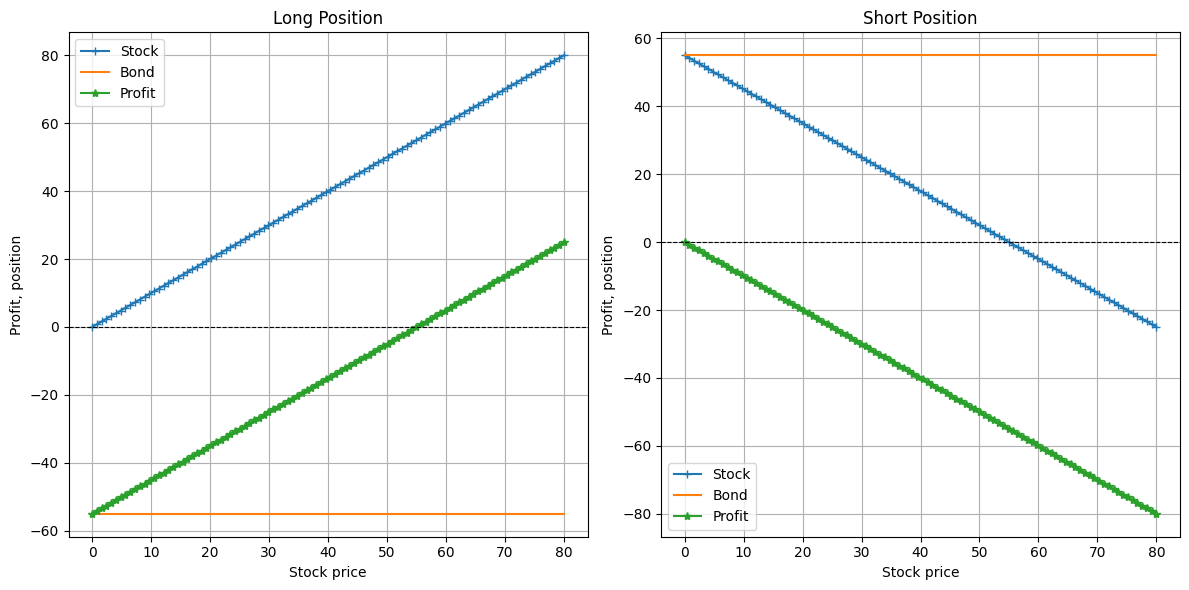

In [2]:
# Example of long stock position and the payoff and profit diagrams
# Anual interest rate
r = 0.1
# Stock price
S = 50

# Stock price range
stock_prices = np.linspace(0, 80, 100)

# Long position calculations
bond_position = -S*(1 + r)
long_stock_profit = stock_prices
long_total_profit = long_stock_profit + bond_position

# Short position calculations
short_stock_profit = -stock_prices - bond_position
short_total_profit = short_stock_profit + bond_position

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for long position
axs[0].plot(stock_prices, long_stock_profit, label="Stock", linestyle="-", marker="+")
axs[0].plot(stock_prices, [bond_position] * len(stock_prices), label="Bond", linestyle="-")
axs[0].plot(stock_prices, long_total_profit, label="Profit", linestyle="-", marker="*")
axs[0].axhline(0, color="black", linewidth=0.8, linestyle="--")  # Horizontal line
axs[0].set_title("Long Position")
axs[0].set_xlabel("Stock price")
axs[0].set_ylabel("Profit, position")
axs[0].legend()
axs[0].grid(True)

# Plot for short position
axs[1].plot(stock_prices, short_stock_profit, label="Stock", linestyle="-", marker="+")
axs[1].plot(stock_prices, [-bond_position] * len(stock_prices), label="Bond", linestyle="-")
axs[1].plot(stock_prices, short_total_profit, label="Profit", linestyle="-", marker="*")
axs[1].axhline(0, color="black", linewidth=0.8, linestyle="--")  # Horizontal line
axs[1].set_title("Short Position")
axs[1].set_xlabel("Stock price")
axs[1].set_ylabel("Profit, position")
axs[1].legend()
axs[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Forwards and Futures Contracts
**Definition of Forward**: an obligation to buy or sell an underlying asset at a specified date in the future, at a price set today

**Futures**: Same as forwards, in principle, except for some institutional and pricing differences.

A forward/futures contract specifies:
- The features and quantity of the asset to be delivered
- The delivery logistics, such as time, date, and place
- The price the buyer will pay at the time of delivery.

Futures contract payoff is its value at expiration.

### Fair value and arbitrage strategy
Forwards and Futures fair value: $F = \text{spot price}*(1+r)$

If the market price of forward or futures contract is above or below its fair vlaue, then a risk free arbitrage profit opportunity exists:

Example:

If $r = 0.2$, spot price = \$1000. Then the fair value for futures should be F=\$1020. Howerever, if we have F = \$1040, then we can:

- Borrow \$1000, buy spot for \$1000, and get short futures
- At expiration, short forward contract requires us to sell spot for \$1040; Then the pay-off:
$$ -\$1000(\text{loan}) - \$ 20(\text{interest}) + \$ 1040 = \$ 20 $$

If futures are cheap: F = \$1000, then:
- Get long futures and sell spot for \$1000, lend \$1000
- At expiration, long forward contract requires us to buy spot for \$ 1000; Then the arbitrage profit:
$$ \$1000(\text{lend}) + \$20(\text{interest}) - \$1000 = \$ 20 $$

## Options

**Definition**: Options are derivative securities whose value is derived from the price of an underlying security such as a common stock, bond, gold, or crude oil.

- Call Options $C_E(S)$: A long call option is the right to buy an asset $S$ at a pre-agreed value $E$ (the strike or exercise price) on a future date.

- Put Options $P_E(S)$: A long put option is the right to  sell an asset $S$ at a pre-agreed value $E$ (the strike or exercise price) on a future date.

Linear combinations of puts and calls can be created for custom payoff structures.

Exercise Style: American or European

Options can also be short-selled:
- A long call option is the right to buy an asset at the strike
price from the short counterparty

- A short call option is an obligation to sell an asset at the
strike price to the long counterparty

- Similarly for the put option.

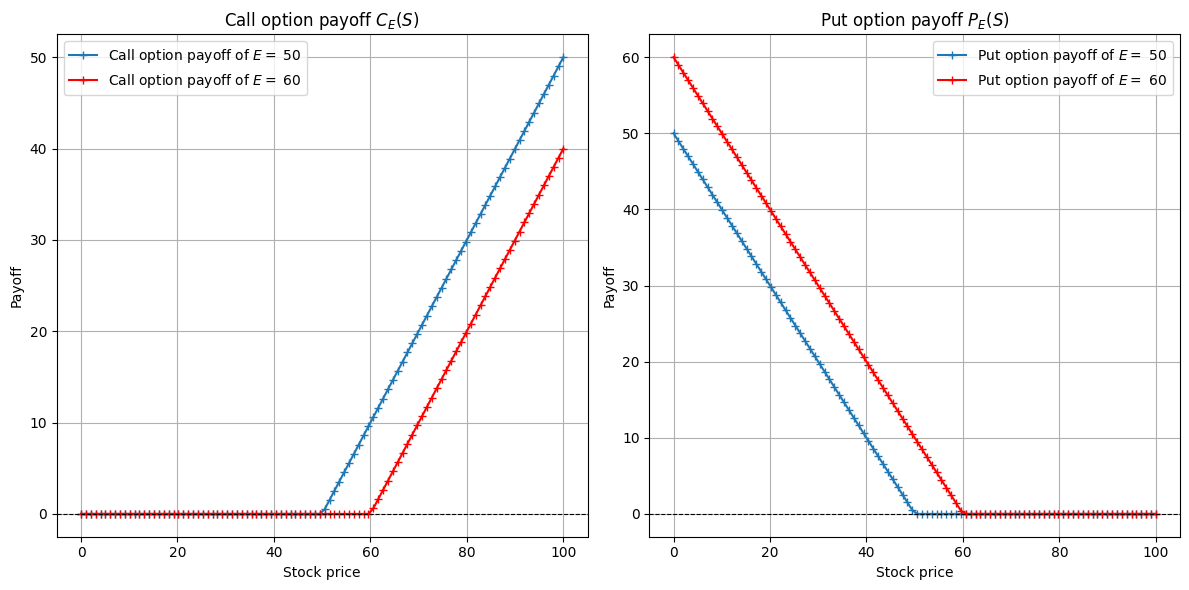

In [3]:
# Draw the value of the call option value at expiration
# Call option payoff
call_strike1 = 50
call_strike2 = 60
stock_prices = np.linspace(0, 100, 100)
fig, axs = plt.subplots(1,2,figsize=(12, 6))
call_payoff1 = np.maximum(stock_prices - call_strike1, 0)
call_payoff2 = np.maximum(stock_prices - call_strike2, 0)
axs[0].plot(stock_prices, call_payoff1, label=f"Call option payoff of $E=$ {call_strike1}", linestyle="-", marker="+")
axs[0].plot(stock_prices, call_payoff2, label=f"Call option payoff of $E=$ {call_strike2}", linestyle="-", marker="+", color="red")
axs[0].axhline(0, color="black", linewidth=0.8, linestyle="--")  # Horizontal line
axs[0].set_title("Call option payoff $C_E(S)$")
axs[0].set_xlabel("Stock price")
axs[0].set_ylabel("Payoff")
axs[0].legend()
axs[0].grid(True)


# Put option payoff

put_payoff1 = np.maximum(call_strike1 - stock_prices, 0)
put_payoff2 = np.maximum(call_strike2 - stock_prices, 0)
axs[1].plot(stock_prices, put_payoff1, label=f"Put option payoff of $E=$ {call_strike1}", linestyle="-", marker="+")
axs[1].plot(stock_prices, put_payoff2, label=f"Put option payoff of $E=$ {call_strike2}", linestyle="-", marker="+", color="red")
axs[1].axhline(0, color="black", linewidth=0.8, linestyle="--")  # Horizontal line
axs[1].set_title("Put option payoff $P_E(S)$")
axs[1].set_xlabel("Stock price")
axs[1].set_ylabel("Payoff")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Option price sensitivities
- Stock price $S$: Call option value goes up as $S$ goes up; Put option value goes down as $S$ goes up.
- Pre-agreed value $E$: Call option value goes down as $E$ goes up; Put option value goes up as $E$ goes up.

### Options Trading Strategies

Options can be used as insurance:

Floors: insure long positions against price declines

- A put option P is combined witha long position in the underlying asset S
- Goal is to insure against losses resulting from a fall in the price of the underlying asset

Caps: insure short positions against price increases

- A call option C is combined with a short position in the underlying asset -S
- Goal is to insure against losses resulting from an incerease in the price of the underlying asset

### Example:
- Long S&R index
- Long S&R put option with strike price of \$1000

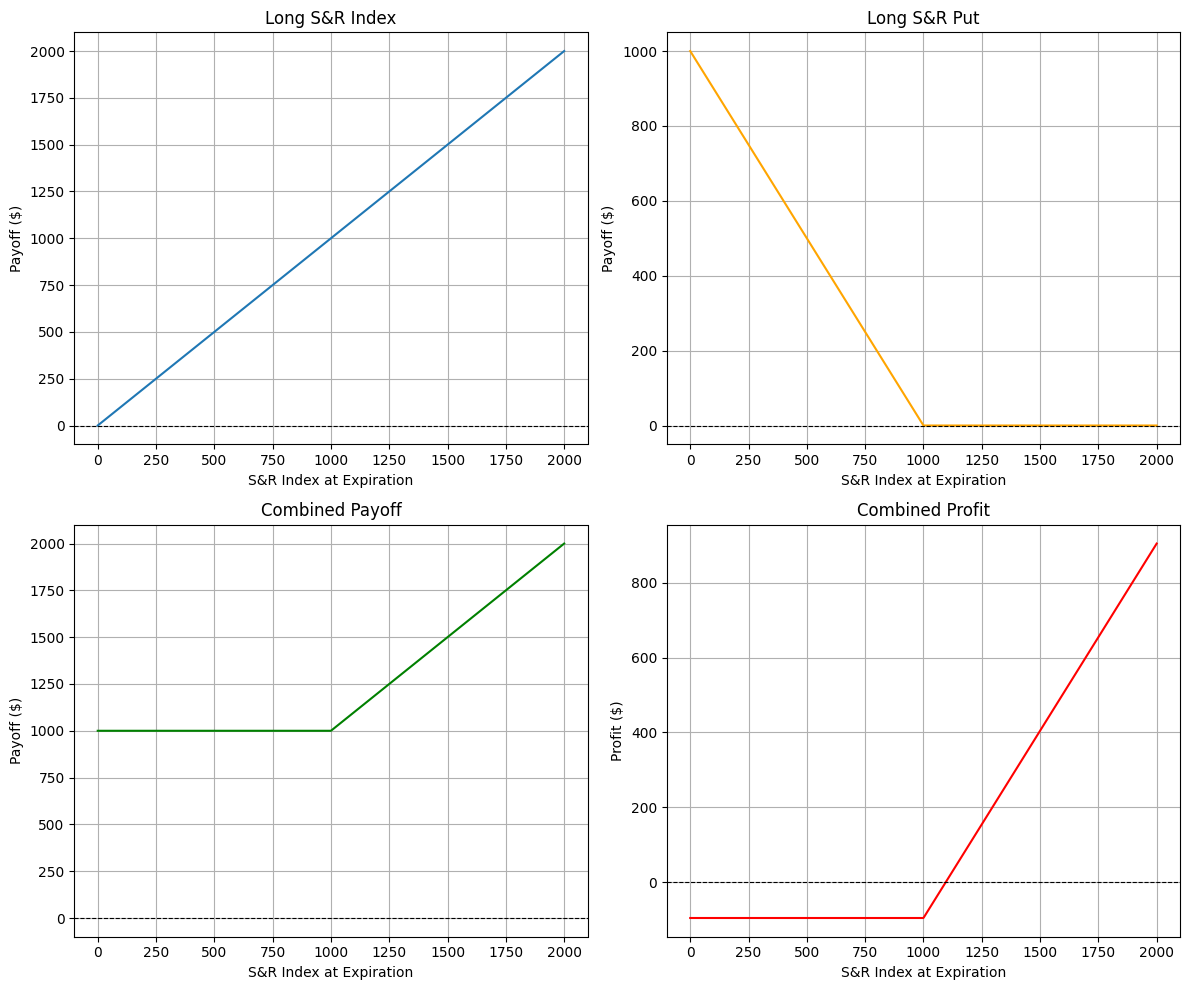

In [4]:
# Parameters
strike_price = 1000  # Strike price of the put option
premium = 95.68      # Premium paid for the put option
index_prices = np.linspace(0, 2000, 1000)  # Index prices at expiration

# Payoff calculations
long_index_payoff = index_prices  # Payoff for a long index position
long_put_payoff = np.maximum(strike_price - index_prices, 0)  # Payoff for a long put option
combined_payoff = long_index_payoff + long_put_payoff  # Combined payoff

# Profit calculations
long_put_profit = long_put_payoff - premium  # Subtract premium from put payoff
combined_profit = combined_payoff - premium - strike_price # Subtract premium from combined payoff

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Long Index Payoff
axs[0, 0].plot(index_prices, long_index_payoff, label="Long Index")
axs[0, 0].axhline(0, color="black", linestyle="--", linewidth=0.8)
axs[0, 0].set_title("Long S&R Index")
axs[0, 0].set_xlabel("S&R Index at Expiration")
axs[0, 0].set_ylabel("Payoff ($)")
axs[0, 0].grid(True)

# Long Put Payoff
axs[0, 1].plot(index_prices, long_put_payoff, label="Long Put", color="orange")
axs[0, 1].axhline(0, color="black", linestyle="--", linewidth=0.8)
axs[0, 1].set_title("Long S&R Put")
axs[0, 1].set_xlabel("S&R Index at Expiration")
axs[0, 1].set_ylabel("Payoff ($)")
axs[0, 1].grid(True)

# Combined Payoff
axs[1, 0].plot(index_prices, combined_payoff, label="Combined Payoff", color="green")
axs[1, 0].axhline(0, color="black", linestyle="--", linewidth=0.8)
axs[1, 0].set_title("Combined Payoff")
axs[1, 0].set_xlabel("S&R Index at Expiration")
axs[1, 0].set_ylabel("Payoff ($)")
axs[1, 0].grid(True)

# Combined Profit
axs[1, 1].plot(index_prices, combined_profit, label="Combined Profit", color="red")
axs[1, 1].axhline(0, color="black", linestyle="--", linewidth=0.8)
axs[1, 1].set_title("Combined Profit")
axs[1, 1].set_xlabel("S&R Index at Expiration")
axs[1, 1].set_ylabel("Profit ($)")
axs[1, 1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

### Synthetic Forwards
A synthetic long forward contract:
- Buying a call and selling a put on the same underlying asset, with each option having the same strike price and time to expiration
- Example: buy the \$1000-strike S&R call and sell the \$1000-strike S&R put, each with 6 months to expiration

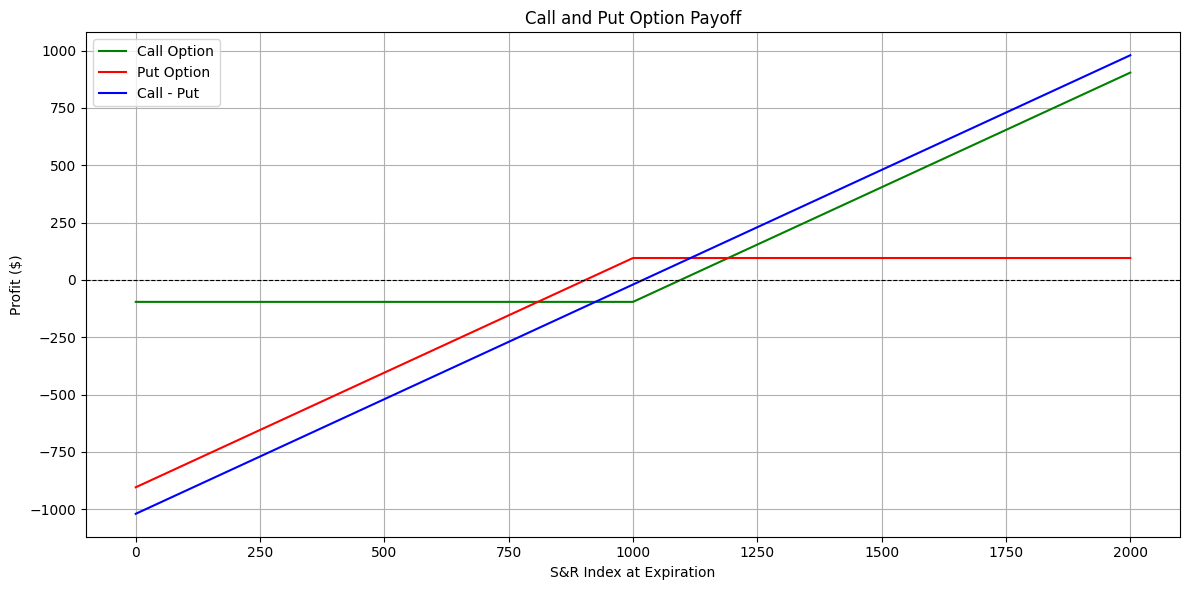

In [5]:
# Parameters
r = 0.02
strike_price = 1000  # Strike price of the put option
premium = 95.68      # Premium paid for the put option
index_prices = np.linspace(0, 2000, 1000)  # Index prices at expiration

# Payoff calculations
call_payoff = np.maximum(index_prices - strike_price, 0) - premium  # Payoff for a call option
put_payoff = np.maximum(strike_price - index_prices, 0) - premium # Payoff for a put option

# Plot
plt.figure(figsize=(12, 6))
plt.plot(index_prices, call_payoff, label="Call Option", color="green")
plt.plot(index_prices, -put_payoff, label="Put Option", color="red")
plt.plot(index_prices, call_payoff - put_payoff - strike_price*r, label="Call - Put", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Call and Put Option Payoff")
plt.xlabel("S&R Index at Expiration")
plt.ylabel("Profit ($)")
plt.legend()
plt.grid(True)

# Display
plt.tight_layout()
plt.show()

**The difference between a long synthetic forward contract and the actual long forward**

- The forward contract has a zero premium, while the synthetic forward requires that we pay the net option premium

- With the forward contract, we pay the forward price, while with the synthetic forward we pay the strike price.

### Put-Call Parity
No-arbitrage pricing: The net cost of buying the index at price E using options must equal the cost of buying the index using a forward contract:
$$ C_E(t)-P_E(t) + PV(E) = PV(F_{0,t})$$

- $C_E(t)$ and $P_E(t)$ denote the premiums of options with strike prie $E$ and time $t$ until expiration, and $PV(F_{0,t})$ is the present value of the forward price.

This is one of the most imporatnt relationships in all of mathematical finance.

The following two portfolios:
- 1: Having the stock along with the right to sell it:
$$ S + P_E(S,t) $$
- 2: Having the right to buy the stock together with enought money to exercise that right:
$$ C_E(S,t) + Ee^{-r(T-t)}$$

The portfolio one: at expiration, the payoff:
$$ S + max(0, E - S) = max(S,E)$$

The portfolio two: at expiration, the payoff:
$$ E + max(0, S-E) = max(S,E)$$

Hence the payoffs at the expiration are identical. No arbitrage argument asserts that the initial costs must be the same.

If $S+P_E(S,t) > C_E(S,t) + Ee^{-r(T-t)}$, then this violates the put-call parity eqaution. Therefore an arbitrage exists:
- Sell the rich portfolio and buy the cheap portfolio.
- Sell $(S+P_E)$ and buy $C_E$ and deposit $Ee^{-r(T-t)}$ in the bank, immediately pocket remaining sum as arbitrage profit: $(S+P_E) - (C_E + Ee^{-r(T-t)}) >0$.
- Wait until expiration for costless liquidation.

At the liquidation stage:
- If $S\geq E$ at expiration: The put option $P_E$ is worthless and will not be exercised. Exercise $C_E$ to buy the stock $S$ at price $E$ using the money in the bank account whose balance is now $E$. Then use the stock you now own to cover your short sale $S$.
- if $S< E$ at expiration: The call option $C_E$ is worthless and will not be exercied. Use the bank balance $E$ to buy the stock at the strike price $E$ when the put option you sold $P_E$ is exercised. THen use the stock you now own to cover your short sale $S$.

### Sharpe Ratio
Measures the performance of an investment such as a security or portfolio compared to a risk-free asset, after adjusting for its risk.

It is defined to be:
$$\text{Sharpe Ratio} =(\text{mean annual return} – \text{risk free return}) /(\text{annualized standard deviation of returns})$$

The Sharpe ratio seeks to characterize how well the return of an asset compensates the investor for the risk taken


### Spread and Collars
- An option **spread** is a position consisting of only
calls or only puts, in which some options are
purchased and some written

- A **collar** is the purchase of a put option and the
sale of a call option with a higher strike price,
with both options having the same underlying
asset and having the same expiration date

### Examples

1: **Bull Spread**

A bull spread is a position, in which you buy a
call and sell an otherwise identical call with a
higher strike price

- It is a bet that the
price of the underlying
asset will increase

- Bull spreads can
also be constructed
using puts


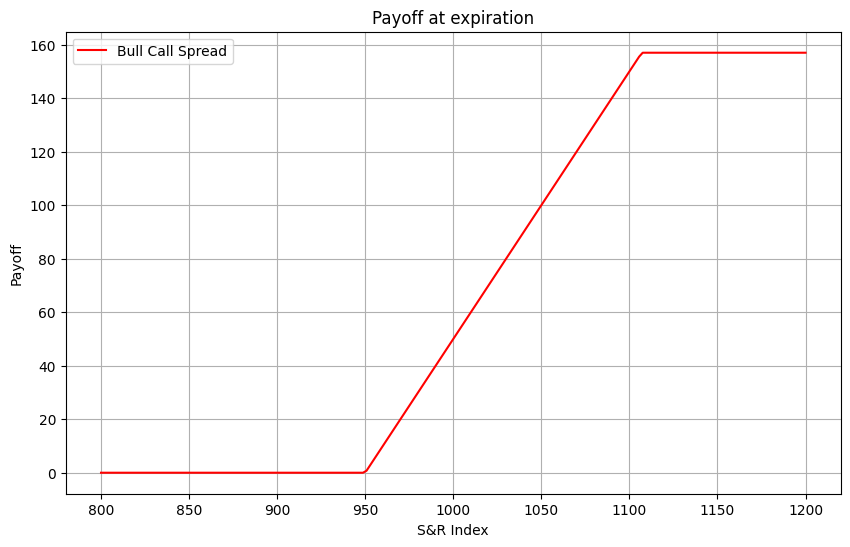

In [6]:

x = np.linspace(800, 1200, 200)
call950 = np.maximum(0, x-950)
call1107 = np.maximum(0, x - 1107)

plt.figure(figsize=(10, 6))
plt.plot(x, call950 - call1107,color = 'red', label = 'Bull Call Spread')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()

plt.show()

2: **Bear Spread**

A bear spread is a position in which one sells a call and buys an
otherwise identical call with a higher strike price

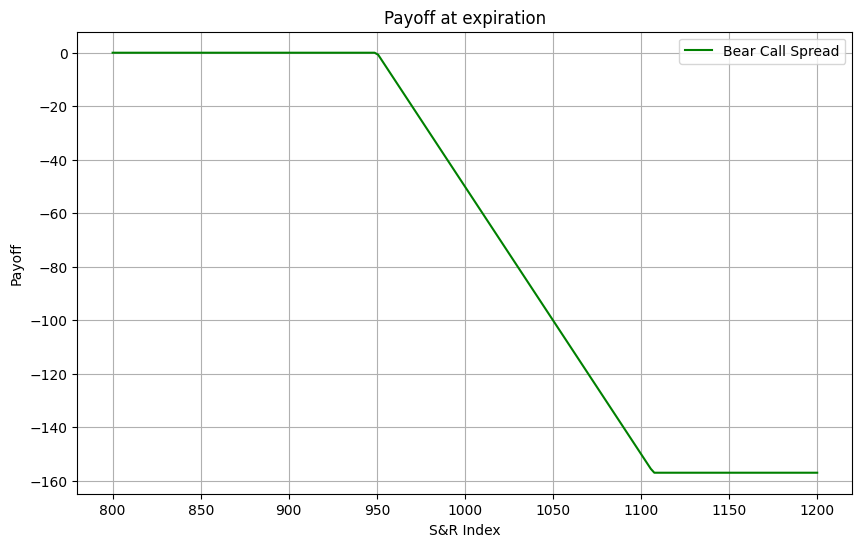

In [7]:
x = np.linspace(800, 1200, 200)
call950 = np.maximum(0, x-950)
call1107 = np.maximum(0, x - 1107)

plt.figure(figsize=(10, 6))
plt.plot(x, - call950 + call1107,color = 'green', label = 'Bear Call Spread')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()

plt.show()

3: **Box Spread**

A box spread is accomplished by using options to create a
synthetic long forward at one price and a synthetic short
forward at a different price

A box spread is a means of borrowing or lending money: It has no stock
price risk

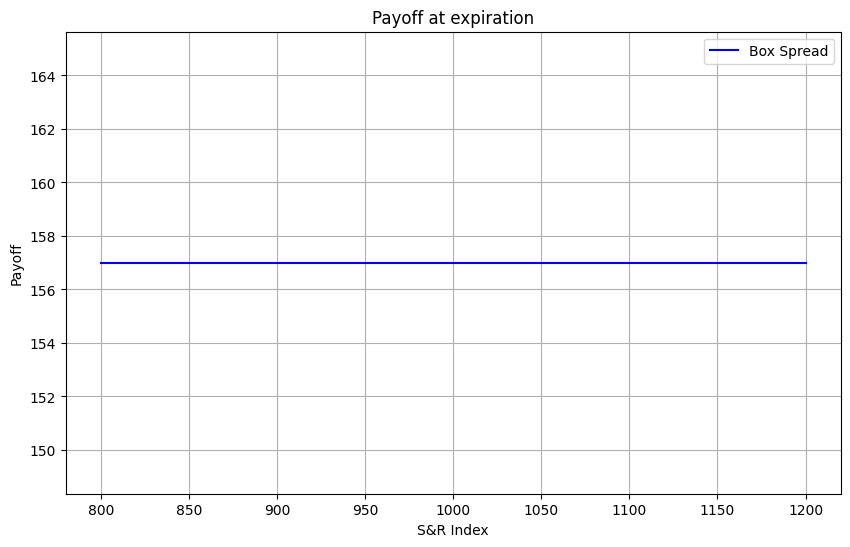

In [8]:
# Box spread
x = np.linspace(800, 1200, 200)
call950 = np.maximum(0, x-950)
call1107 = np.maximum(0, x - 1107)
put950 = np.maximum(0, 950 - x)
put1107 = np.maximum(0, 1107 - x)
plt.figure(figsize=(10, 6))
plt.plot(x, call950 - call1107 - put950 + put1107,color = 'blue', label = 'Box Spread')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()
plt.show()

4: **Ratio Spread**

A ratio spread is constructed by buying m calls at one strike and
selling n calls at a different strike, with all options having the
same time to maturity and same underlying asset

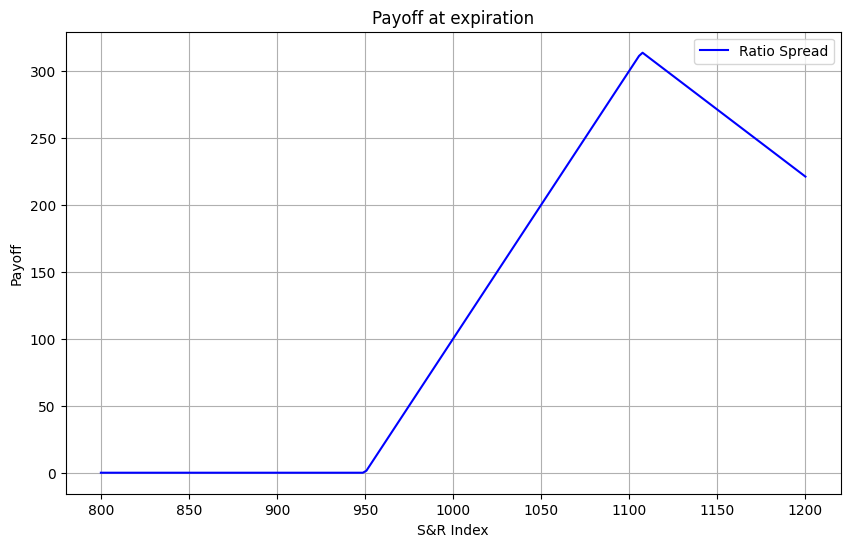

In [9]:
# Ratio spread
x = np.linspace(800, 1200, 200)
call950 = np.maximum(0, x-950)
call1107 = np.maximum(0, x - 1107)

m = 2
n = 3 

plt.figure(figsize=(10, 6))
plt.plot(x, m*call950 - n*call1107,color = 'blue', label = 'Ratio Spread')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()
plt.show()

5: **zero-cost collar**

A zero-cost collar
can be created when
the premiums of the
call and put exactly
offset one another


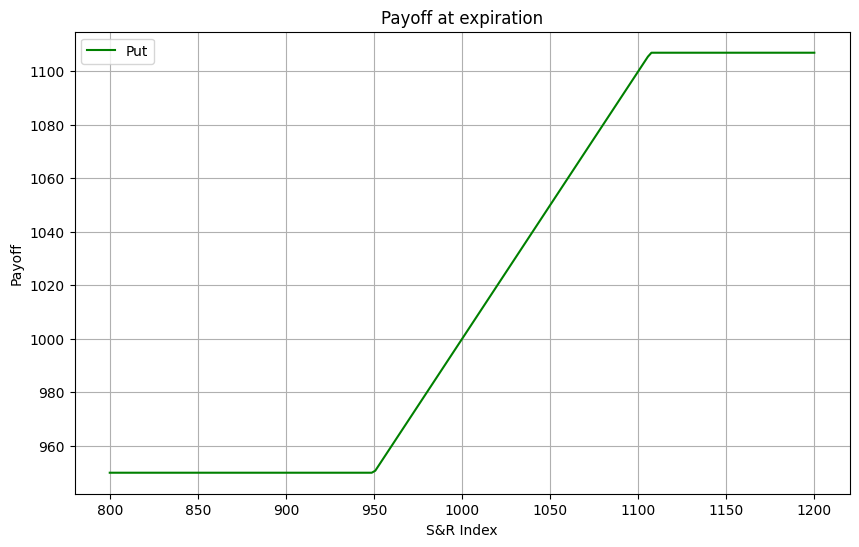

In [10]:
x = np.linspace(800, 1200, 200)
put950 = np.maximum(0, 950 - x)
premium950 = 51.873
call1107 = np.maximum(0, x - 1107)
premium1107 = 51.777

plt.figure(figsize=(10, 6))
plt.plot(x, x+put950 - premium950 - call1107 + premium1107,color = 'green', label = 'Put')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()

plt.show()

In [11]:
print(f'The net premium is ${-premium950+premium1107:.3f}')

The net premium is $-0.096


**When we want to bet against the volatility, we can use the following**:

6: **Stradles**

Buying a call and
a put with the
same strike price
and time to
expiration

A straddle is a bet that volatility will be high
relative to the market’s assessment

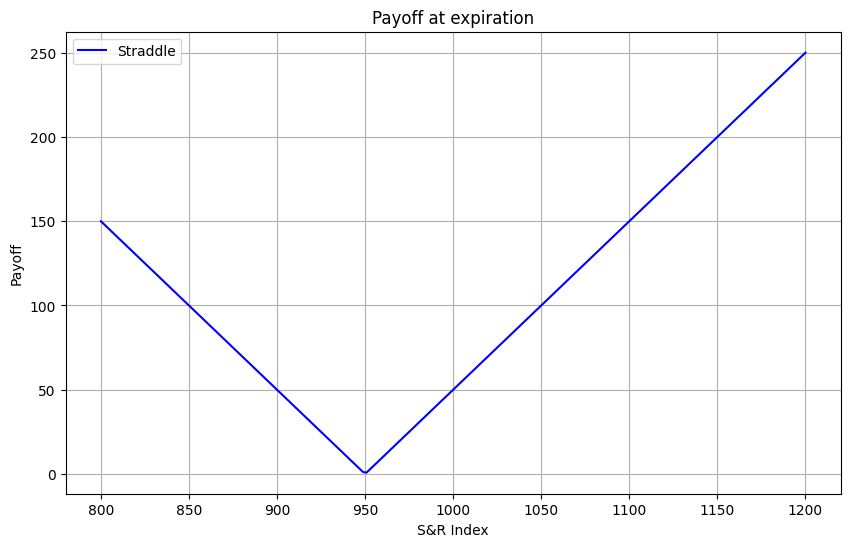

In [12]:
# Straddle
x = np.linspace(800, 1200, 200)
call950 = np.maximum(0, x-950)
put950 = np.maximum(0, 950 - x)
plt.figure(figsize=(10, 6))
plt.plot(x, call950 + put950,color = 'blue', label = 'Straddle')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()
plt.show()

7: **Strangles**

Buying an out-of-
the-money call
and put with the
same time to
expiration

A strangle can be used to reduce the high premium
cost, associated with a straddle

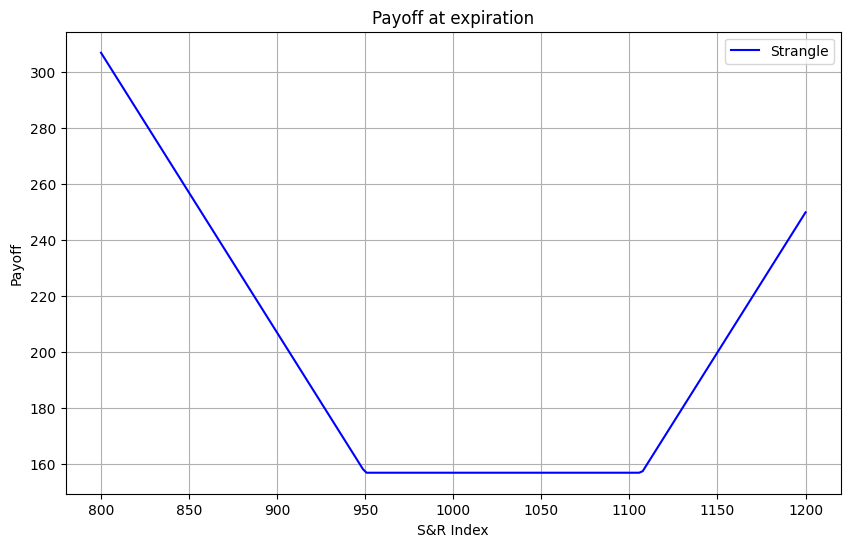

In [13]:
# Strangle
x = np.linspace(800, 1200, 200)
call950 = np.maximum(0, x-950)
put1107 = np.maximum(0, 1107 - x)
plt.figure(figsize=(10, 6))
plt.plot(x, call950 + put1107,color = 'blue', label = 'Strangle')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()
plt.show()

8: **Written Straddles**

Selling a call and
put with the same
strike price and
time to maturity

Unlike a purchased straddle, a written straddle is a
bet that volatility will be low relative to the
market’s assessment


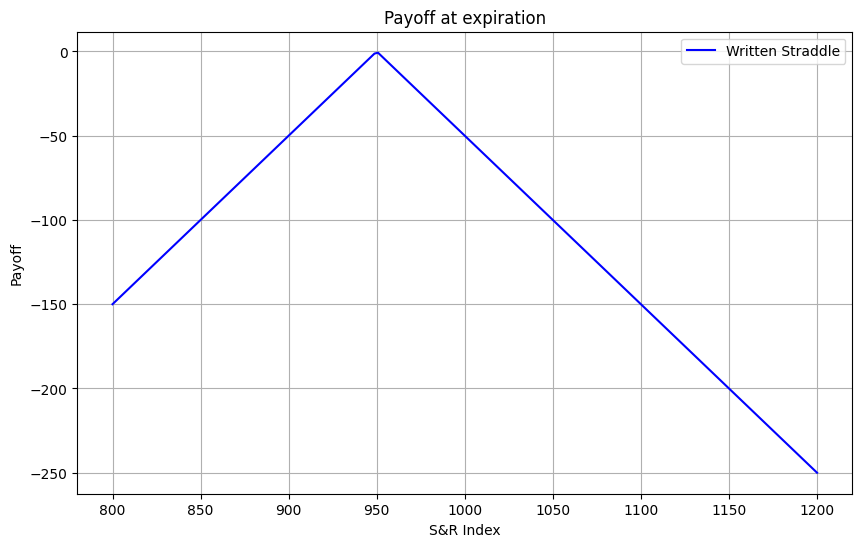

In [14]:
# Written Straddle
x = np.linspace(800, 1200, 200)
call950 = np.maximum(0, x-950)
put950 = np.maximum(0, 950 - x)
plt.figure(figsize=(10, 6))
plt.plot(x, -call950 - put950,color = 'blue', label = 'Written Straddle')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()
plt.show()

9: **Butterfly Spreads**

Write a straddle +
add a strangle =
insured written
straddle

A butterfly spread insures against large losses
on a straddle

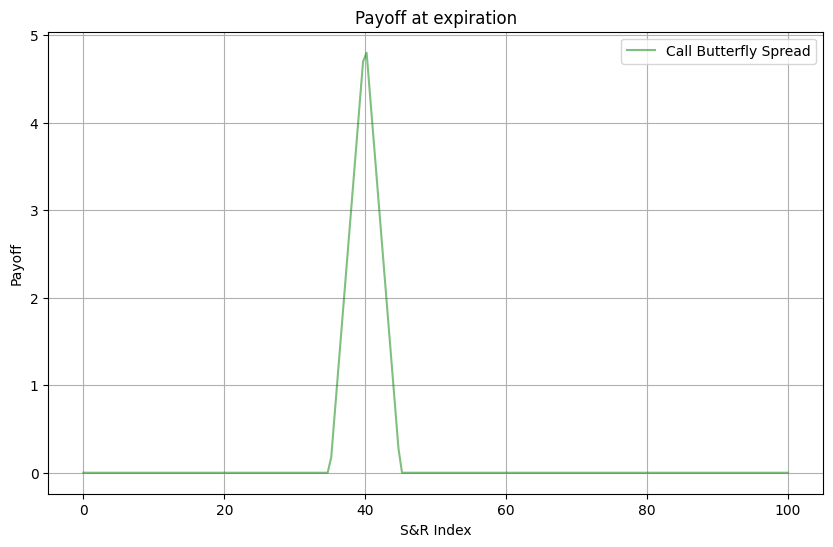

In [15]:
# Butterfly spread
x = np.linspace(0, 100, 200)
call35 = np.maximum(0, x - 35)
call40 = np.maximum(0, x - 40)
call45 = np.maximum(0, x - 45)
plt.figure(figsize=(10, 6))
plt.plot(x, call35 - 2*call40 + call45,color = 'green', label = 'Call Butterfly Spread', alpha = 0.5)
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()
plt.show()

10: **Asymmetric Butterfly**

The right ratio is given by:
$$ \lambda = \frac{K_3-K_2}{K_3-K_1} = \frac{1050-1020}{1050-950} = 0.3$$

In order to construct the asymmetric butterfly, for every 1,020-strike call we write, we buy λ
950-strike calls and 1 − λ 1,050-strike calls. Since we can only buy whole units of calls, we will
in this example buy three 950-strike and seven 1,050-strike calls, and sell ten 1,020-strike calls.

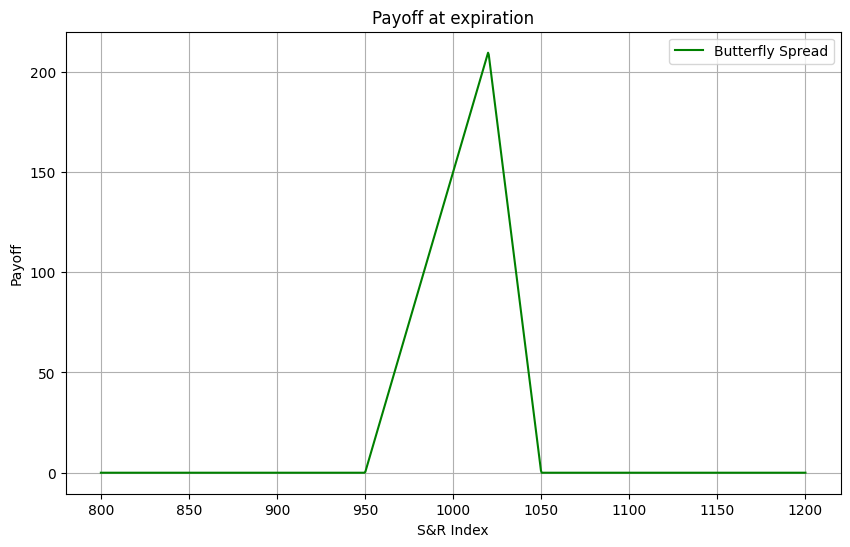

In [16]:
x = np.linspace(800, 1200, 1000)

call950 = np.maximum(0, x-950)
call1020 = np.maximum(0, x-1020)
call1050 = np.maximum(0, x-1050)

plt.figure(figsize=(10, 6))
plt.plot(x, 3*call950 + 7*call1050 - 10*call1020,color = 'green', label = 'Butterfly Spread')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()

plt.show()

## Risk Management

Risk is uncertainty. We want to use different type of derivatives(options, forward,...) to hedge. Know your role!

## Linear Regression and Optimal Headging

Suppose we have two underlying assets, $X$ and $Y$. We treat the price of $X$ and $Y$ as random variables. Thus, with a lot of observations (samples), we can compute the sample mean and sample (co)variance:

$$ \bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$$
$$ \bar{Y} = \frac{1}{n}\sum_{i=1}^n Y_i$$
$$ S_X^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i-\bar{X})^2$$
$$ S_Y^2 = \frac{1}{n-1}\sum_{i=1}^n (Y_i-\bar{Y})^2$$
$$ S_{XY}^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})$$

Here $n-1$ is taken to make these statistics to be unbiased estimators.

Our goal: find the best $a$ and $b$ such that $ Z = aX + bY$ such that the variance $ \sigma_Z^2 $ is minimized. Mathematically, this can be solved:
$$ \sigma_Z^2 = a^2\sigma_X^2 + b^2\sigma_Y^2 + 2ab\rho \sigma_X \sigma_Y$$

with $\sigma_X^2 = S_X^2$, $\sigma_Y^2 = S_Y^2$, $\rho = \frac{S_{XY}^2}{\sqrt{S_X^2}\sqrt{S_Y^2}}$. Substitude $\beta = a/b$, taking derivative with respect to $\beta$, we have:
$$ \frac{\partial}{\partial \beta} \sigma_Z^2 = 2b^2(\sigma_X^2 \beta + \rho\sigma_X\sigma_Y) = 0$$

We can solve $\beta = -\frac{\rho \sigma_X \sigma_Y}{\sigma_X^2} = -\frac{Cov(X,Y)}{\sigma_X^2}$

Note $-\beta$ is exactly the slope of the linear regression line when we want to find the linear relation of $X$ and $Y$, e.g. the linear model for $X$ and $Y$ is given by 
$$Y-\bar{Y} = -\beta (X - \bar{X}) + \epsilon$$

where $\epsilon$ is the error. Typically, $\epsilon \sim N(0,\sigma^2)$ for some $\sigma^2$.

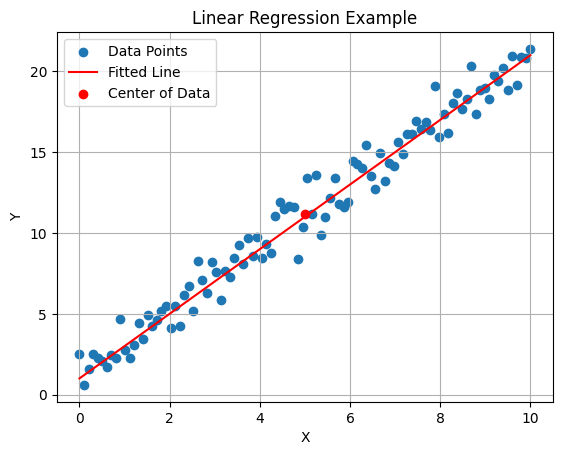

In [6]:
# Example of the linear regression
X = np.linspace(0, 10, 100)
sigma = 1
Y = 2*X + 1 + np.random.normal(0, sigma, len(X))
plt.scatter(X, Y, label='Data Points')
plt.plot(X, 2*X + 1, color='red', label='Fitted Line')
# Plot the center of the data
plt.scatter(np.mean(X), np.mean(Y), color='red', label='Center of Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Example')
plt.legend()
plt.grid()
plt.show()

### Example:
Suppose that we can produce one widget with $\lambda$ ounces of gold. If we produce $N_w$ widgets at a price of $P_w$ and do not hedge, profit is:
$$ Profit=N_wP_w-\lambda N_w P_g$$
where $P_g$ is the future spot rpice of gold.

Now suppose that we hedge by going long $H$ gold futures contracts, with each contract covering $q$ oz of gold. If $F$ is the gold forward price, the profit on the hedged position is
$$ \begin{align*}\text{Hedged profit} &= N_w P_w - \lambda N_w P_g + Hq(P_g - F)\\ 
&= N_w P_w + (Hq - \lambda N_w)P_g - HqF\end{align*}$$

The variance of hedged profit is
$$ \sigma_{\text{hedged}}^2 = N_w^2 \sigma_w^2 + (Hq - \lambda N_w)^2\sigma_g^2 + 2N_w(Hq-\lambda N_w)\rho \sigma_w \sigma_g$$
where $\sigma_w$ is the standard deviation of the widget price, $\sigma_g$ is the standard deviation of the gold price, and $\rho$ is the price correlation between widgets and gold. The covariance between widget and gold prices is $\rho\sigma_w\sigma_g$.

We can select $H$ so as to minimize the variance of hedged profit. The variance-minimizing hedge position, $H^*$ satisfies:
$$ qH^* = \lambda N_w - N_w \frac{\rho \sigma_w}{\sigma_g}$$


## Financial Forwards and Futures

### Alternative ways to buy a stock

- Outright purchase: ordinary transaction
- Fully leveraged purchase: investor borrows the full amount
- Prepaid forward contract: pay today, receive the share later
- Forward contract: agree on price now, pay/receive later


### Buying:
![table](../img/134B_Note_1.png "Title")

### Selling:
![table](../img/134B_Note_2.png "Title")

### Dividends:
- Continuous dividends: If continuously paid dividends are reinvested, then number of shares grows continuously. Fair value fo the prepaid forward contract for one share of stock at time $T$ is based on $e^{-\delta T}$ shares at time zero, i.e. 
$$F = S_0 e^{-\delta T}$$

- Discrete dividends: Stocks may pay discrete dividends $D_k$ at times $t_k$. Owner of stock receives cash dividends. Holder of long forward position does not receive dividends. Fair value of prepaid forward contract must be discounted by present value of dividends, i.e.:
$$F = S_0 - \sum_{k=1}^n D_k e^{-r_k}$$

If there is a price difference, the risk-free arbitrage strategy exists.

### Futures contracts

The main difference between futures contracts and forwards contracts are:

- Future contracts settled daily through the mark-to-market process to manage credit
risk. Mark-to-market means the determination of who owes what to whom.
- Future contracts are highly liquid: easier to offset an existing position.
- Future contracts are highly standardized structure: harder to customize.